In [16]:
import matplotlib.pyplot as plt
import pickle
import random
import dadi
import os, sys
sys.path.append(os.path.join(os.getcwd(), '..')) # this is the ml_dadi dir
import data_manip, plotting
from data_manip import msprime_two_epoch, msprime_generate_data_parallel
from plotting import plot_accuracy_multi

In [2]:
# msprime demographic and ancestry simulation parameters (unchanged params)
s1 = 5_000 # ancestral pop size
ns = 10 # sample size
ploidy = 2 # diploid
seq_l = 2_000 # sequence length in basepair
mut = 1e-3 # mutation rate

In [3]:
# generate test params (nu, T) similar to dadi
test_params = []
while len(test_params) < 100: 
# generate random nu and T within the same range as training data range
    nu = random.random() * 4 - 2 # nu in log scale
    T = random.random() * 1.9 + 0.1
    if T/10**nu <= 5: # exclude T/nu > 5
        params = (nu, T)
        test_params.append(params)

In [4]:
# generate list of two_epoch demography params for msprime based on dadi test params
dem_list = [msprime_two_epoch(s1, p) for p in test_params]

In [5]:
# generate msprime simulations
list_test_dict_msprime = []

# list of recombination rate for variance, from low to high variance 
# (high to low recombination rate)
recomb_list = [1e-3, 1e-5, 1e-6, 1e-8]
for recomb in recomb_list:
    list_test_dict_msprime.append(msprime_generate_data_parallel(test_params,
                                    dem_list, ns, ploidy, seq_l, recomb, mut))

In [6]:
pickle.dump(list_test_dict_msprime, open('data/test_data_msprime', 'wb'), 2)

In [7]:
# load list of train rfr
list_rfr = pickle.load(open('data/new_log/list_rfr_exclude_log','rb'))
# load list of trained mlpr with lbfgs solver
list_mlpr_lbfgs = pickle.load(open('data/new_log/list_mlpr_exclude_log_lbfgs','rb'))
# load list of trained mlpr with adam solver
list_mlpr_adam = pickle.load(open('data/new_log/list_mlpr_exclude_log_adam','rb'))

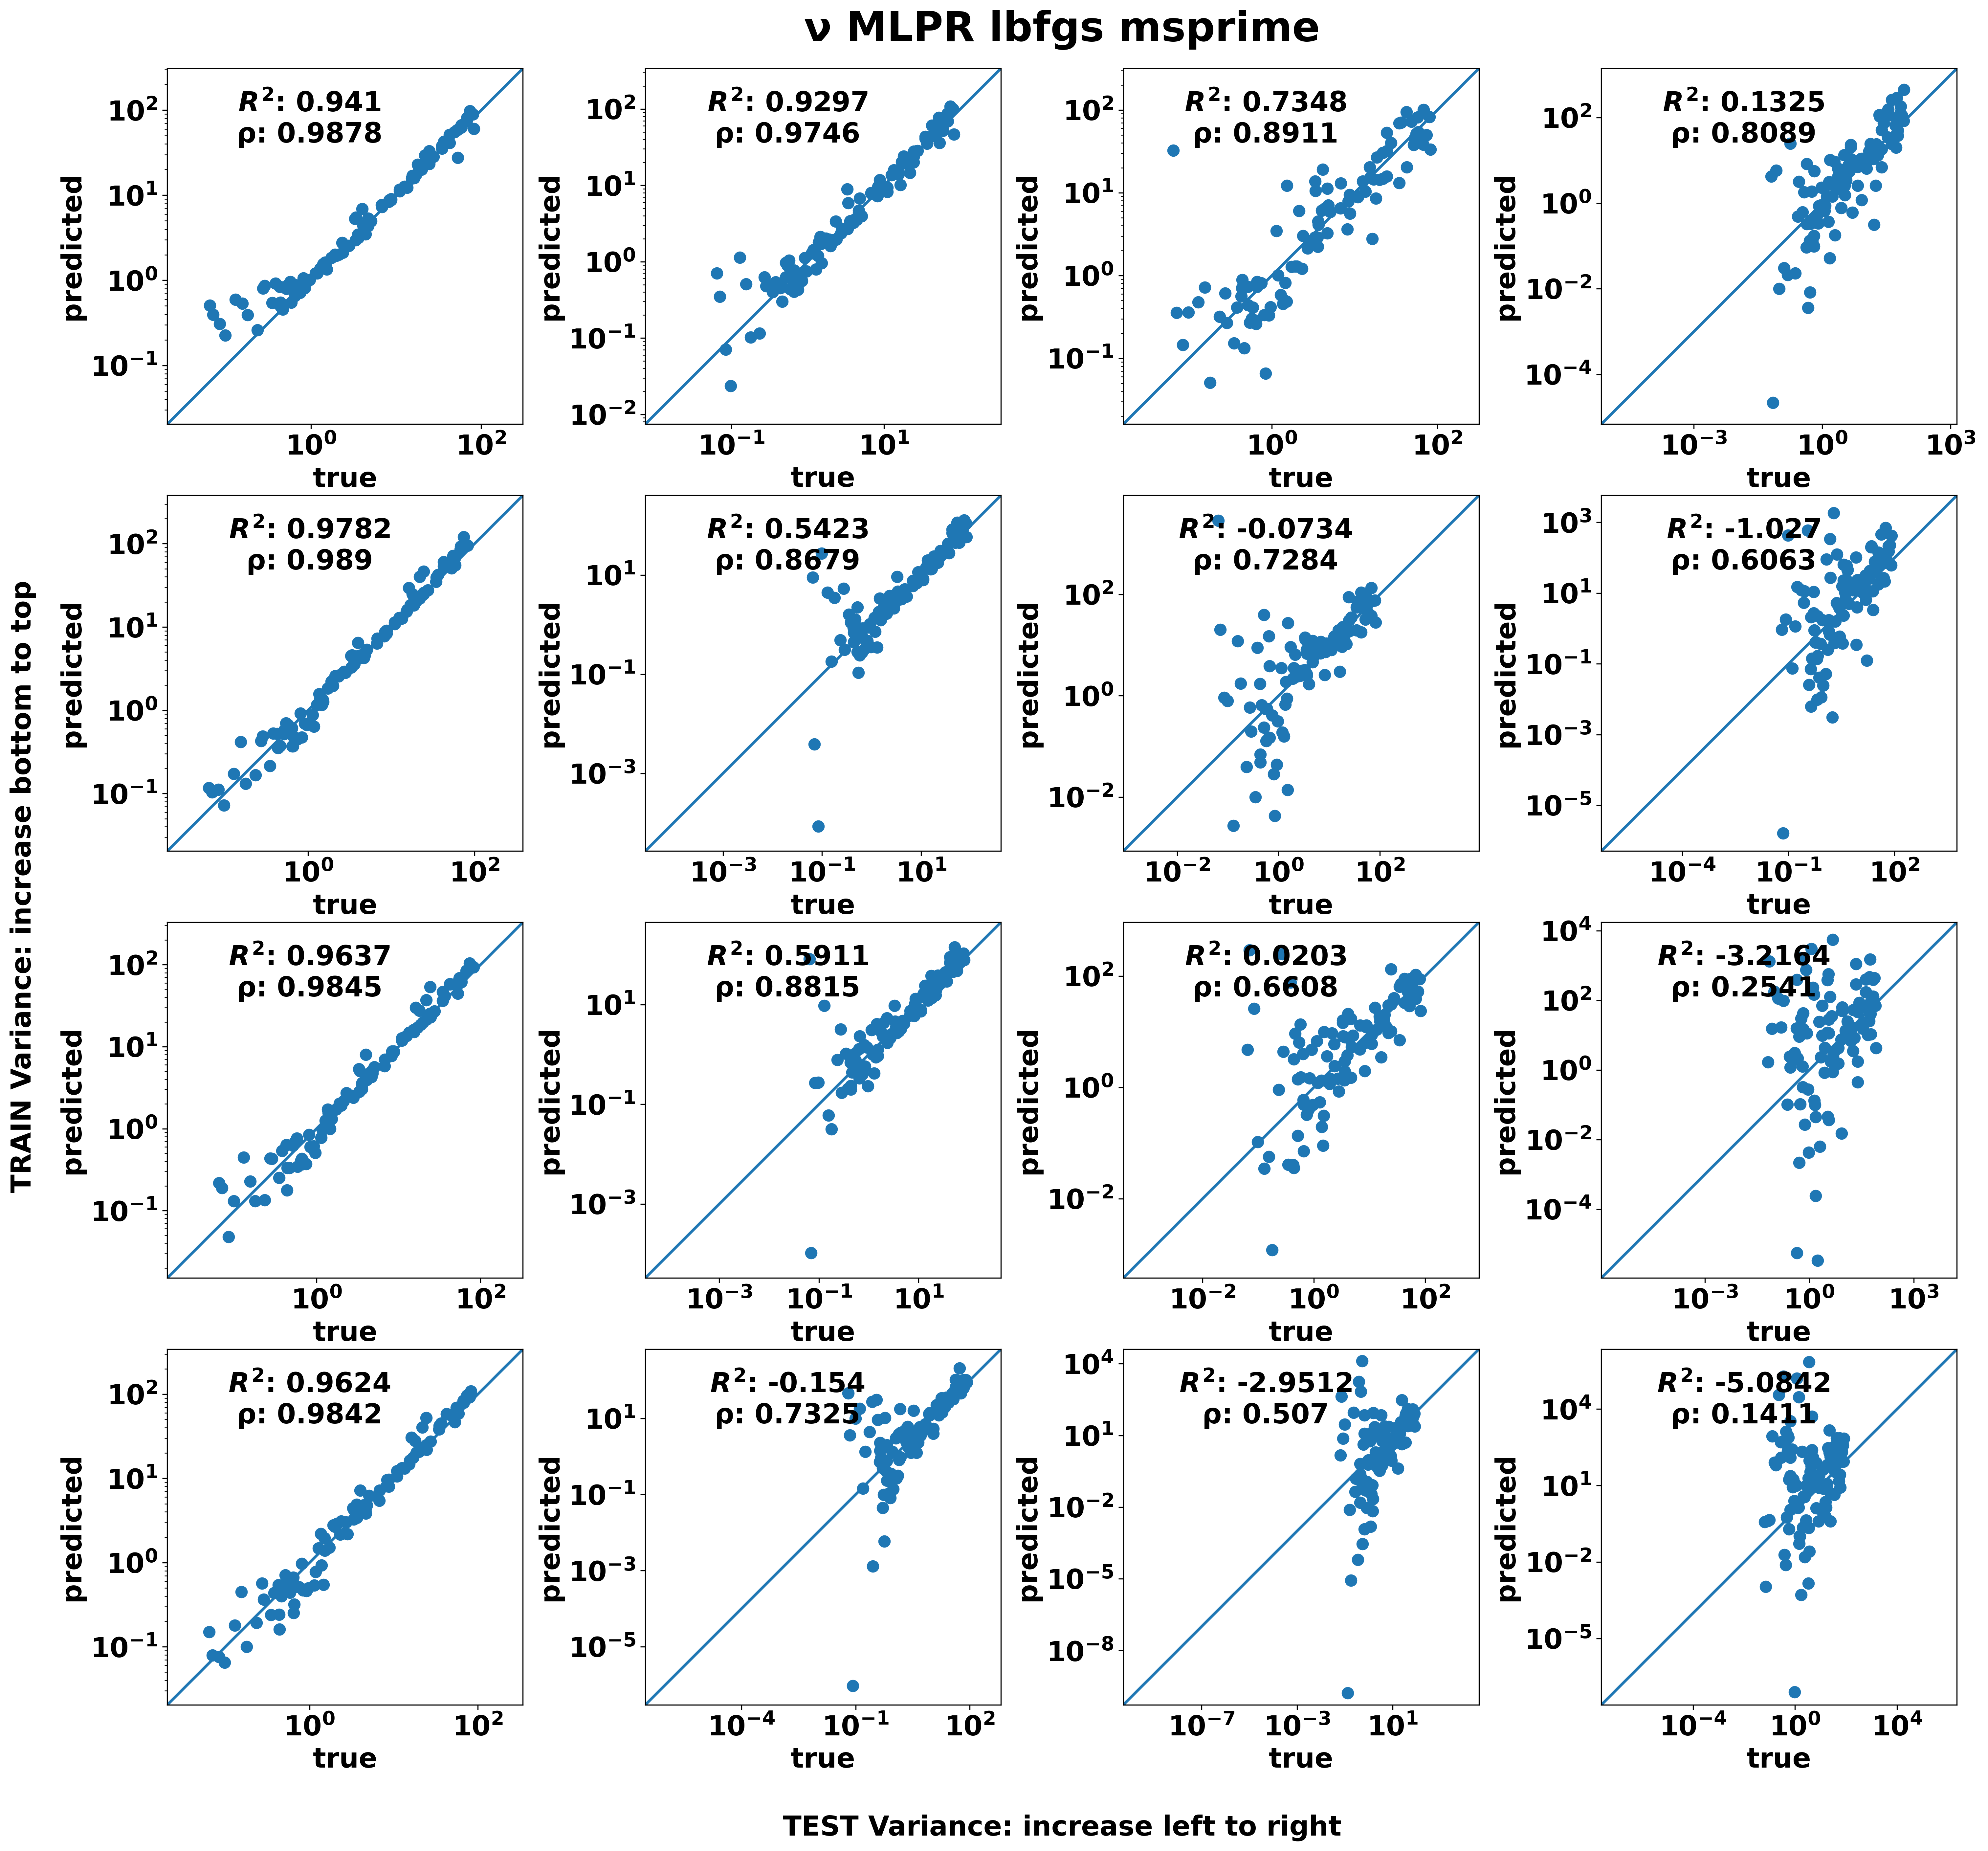

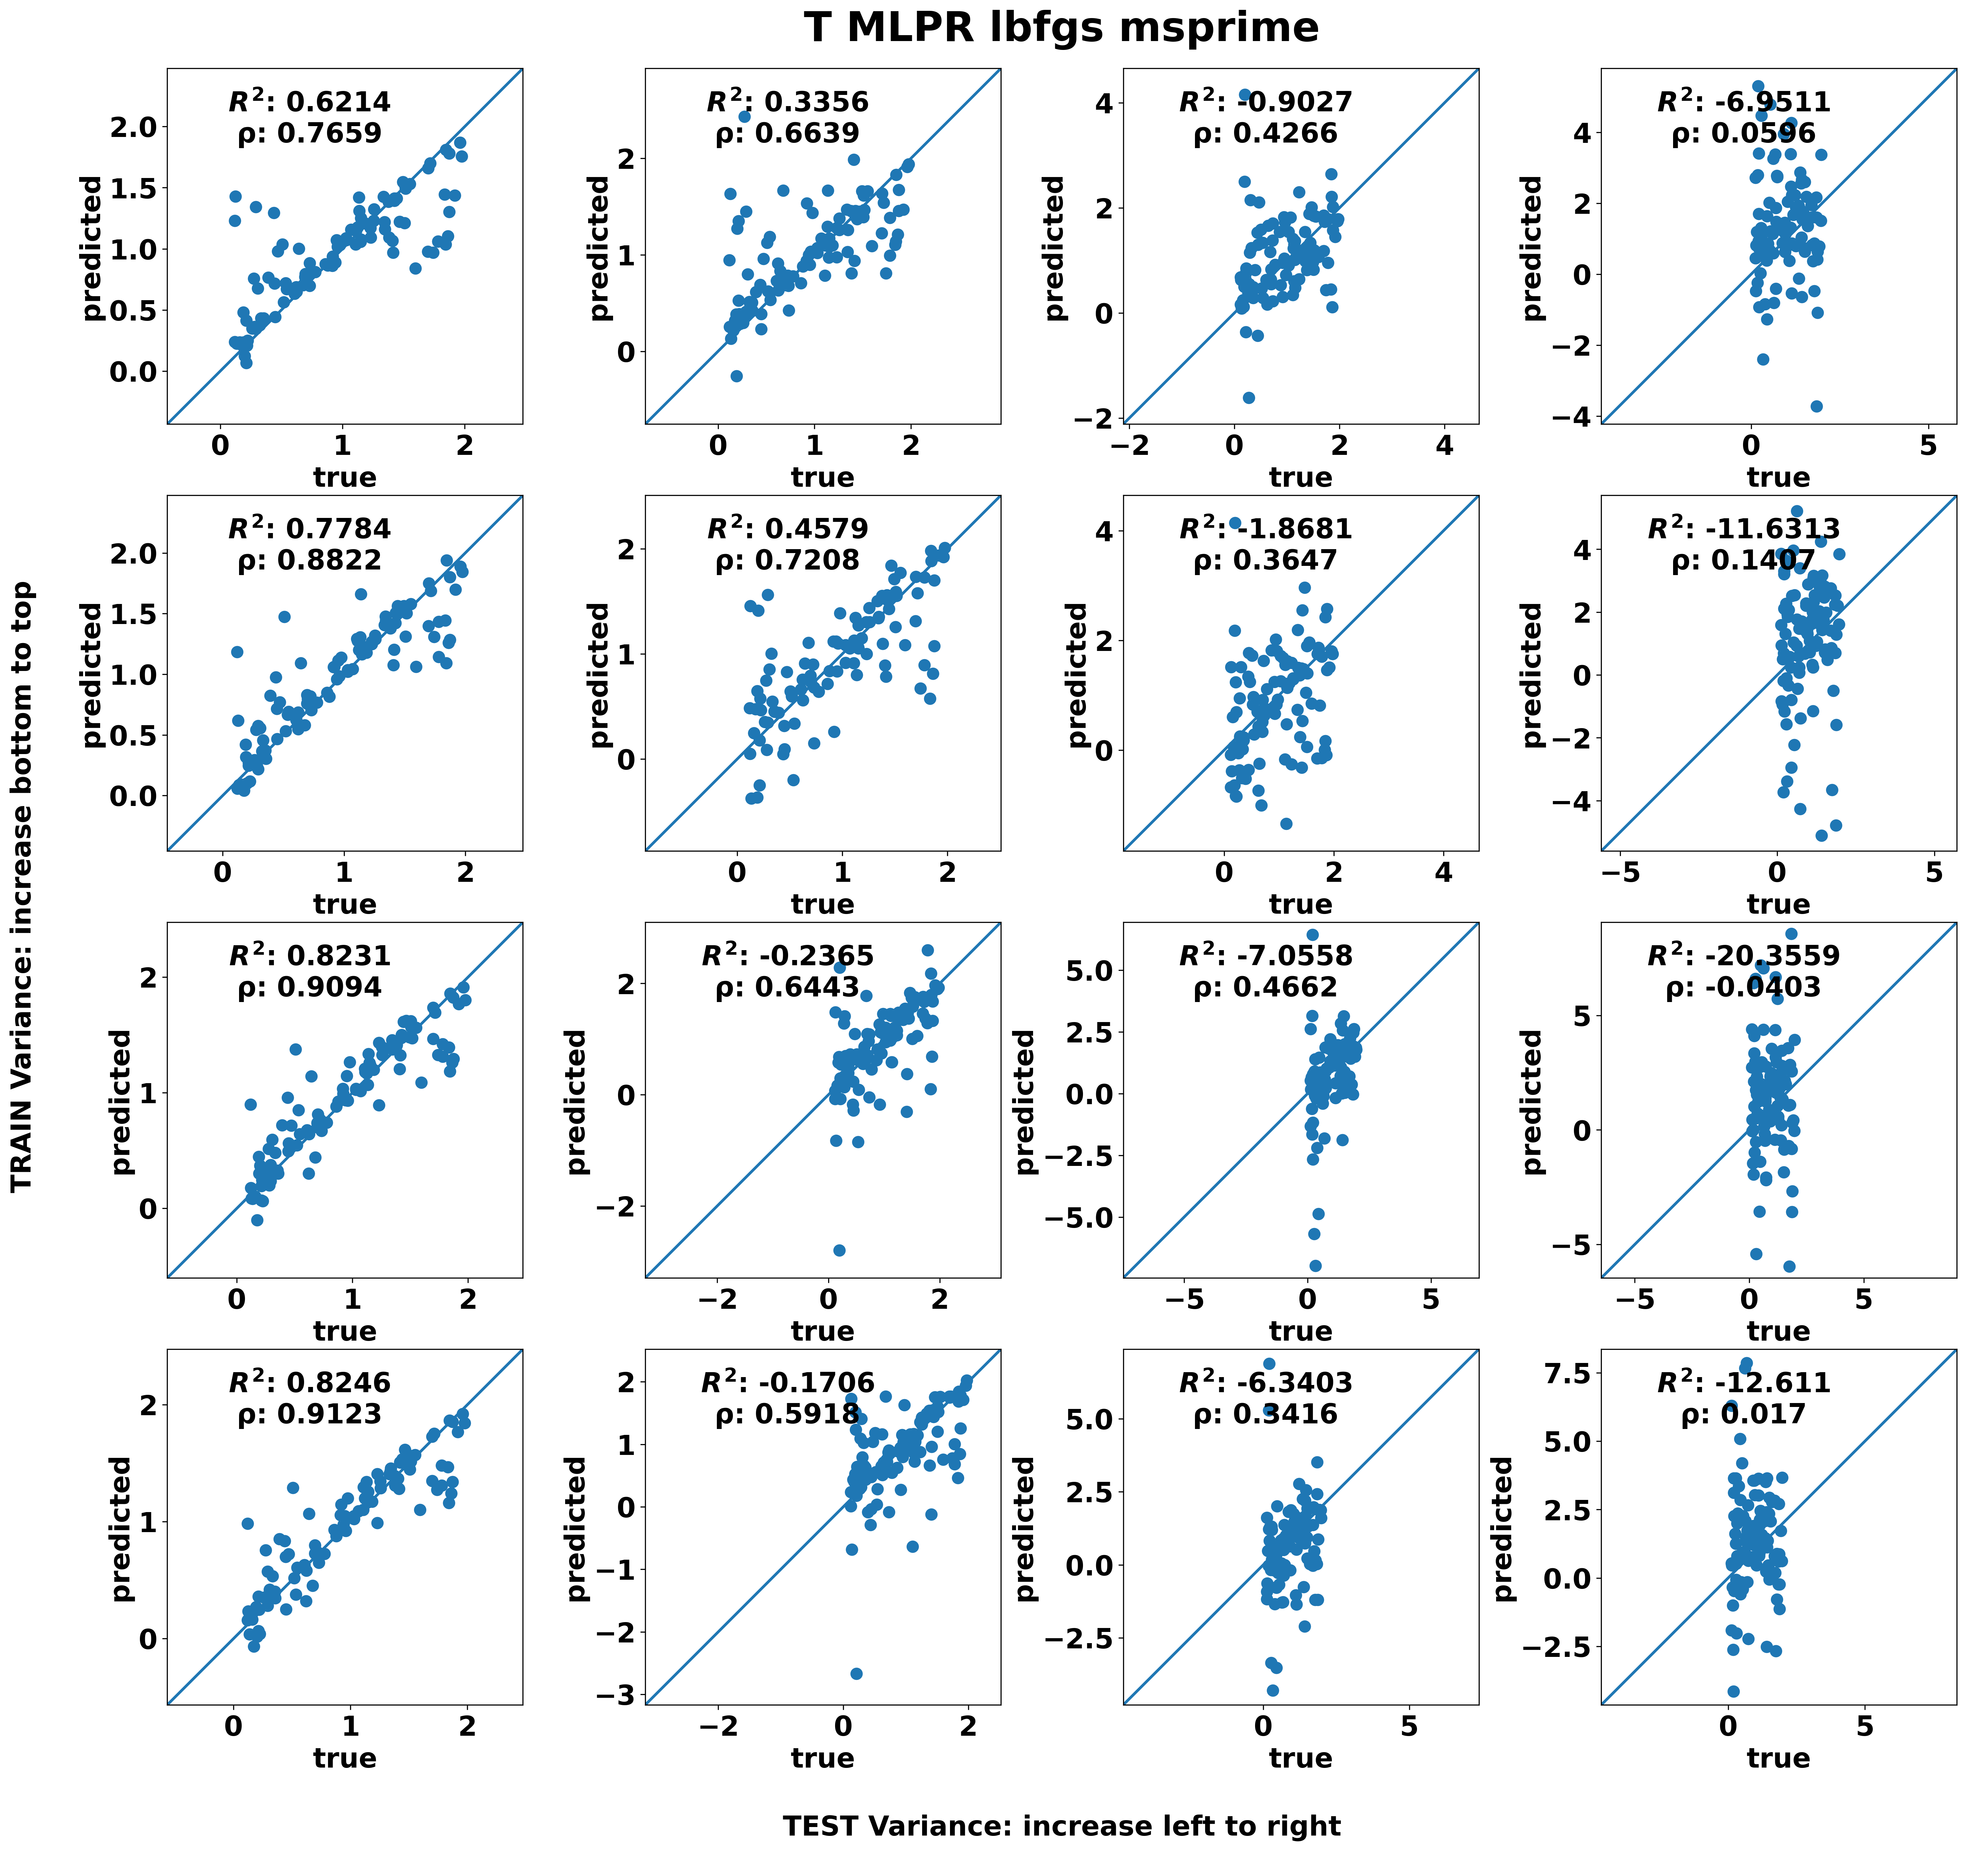

In [9]:
# Plot 4x4 MLPR lbfgs
params = ['ν','T']
model_name = 'MLPR lbfgs msprime'
logs = [True, False]
size = ((30, 20), (20, 80), (8,2,20), (24,22))
# size_format = ( (title_font_size, title_pad), (axis_font_size, axis_pad),
#                   (single_size_tuple), fig_size)
# single_size_tuple = (dots_size, line_width, font_size)
plot_accuracy_multi(list_mlpr_lbfgs, list_test_dict_msprime, 
                        params, model_name, logs, size)
# save fig
# for i in range(len(params)):
#     plt.figure(i+1).savefig(f'results/{model_name}/{params[i]}_4x4.png')

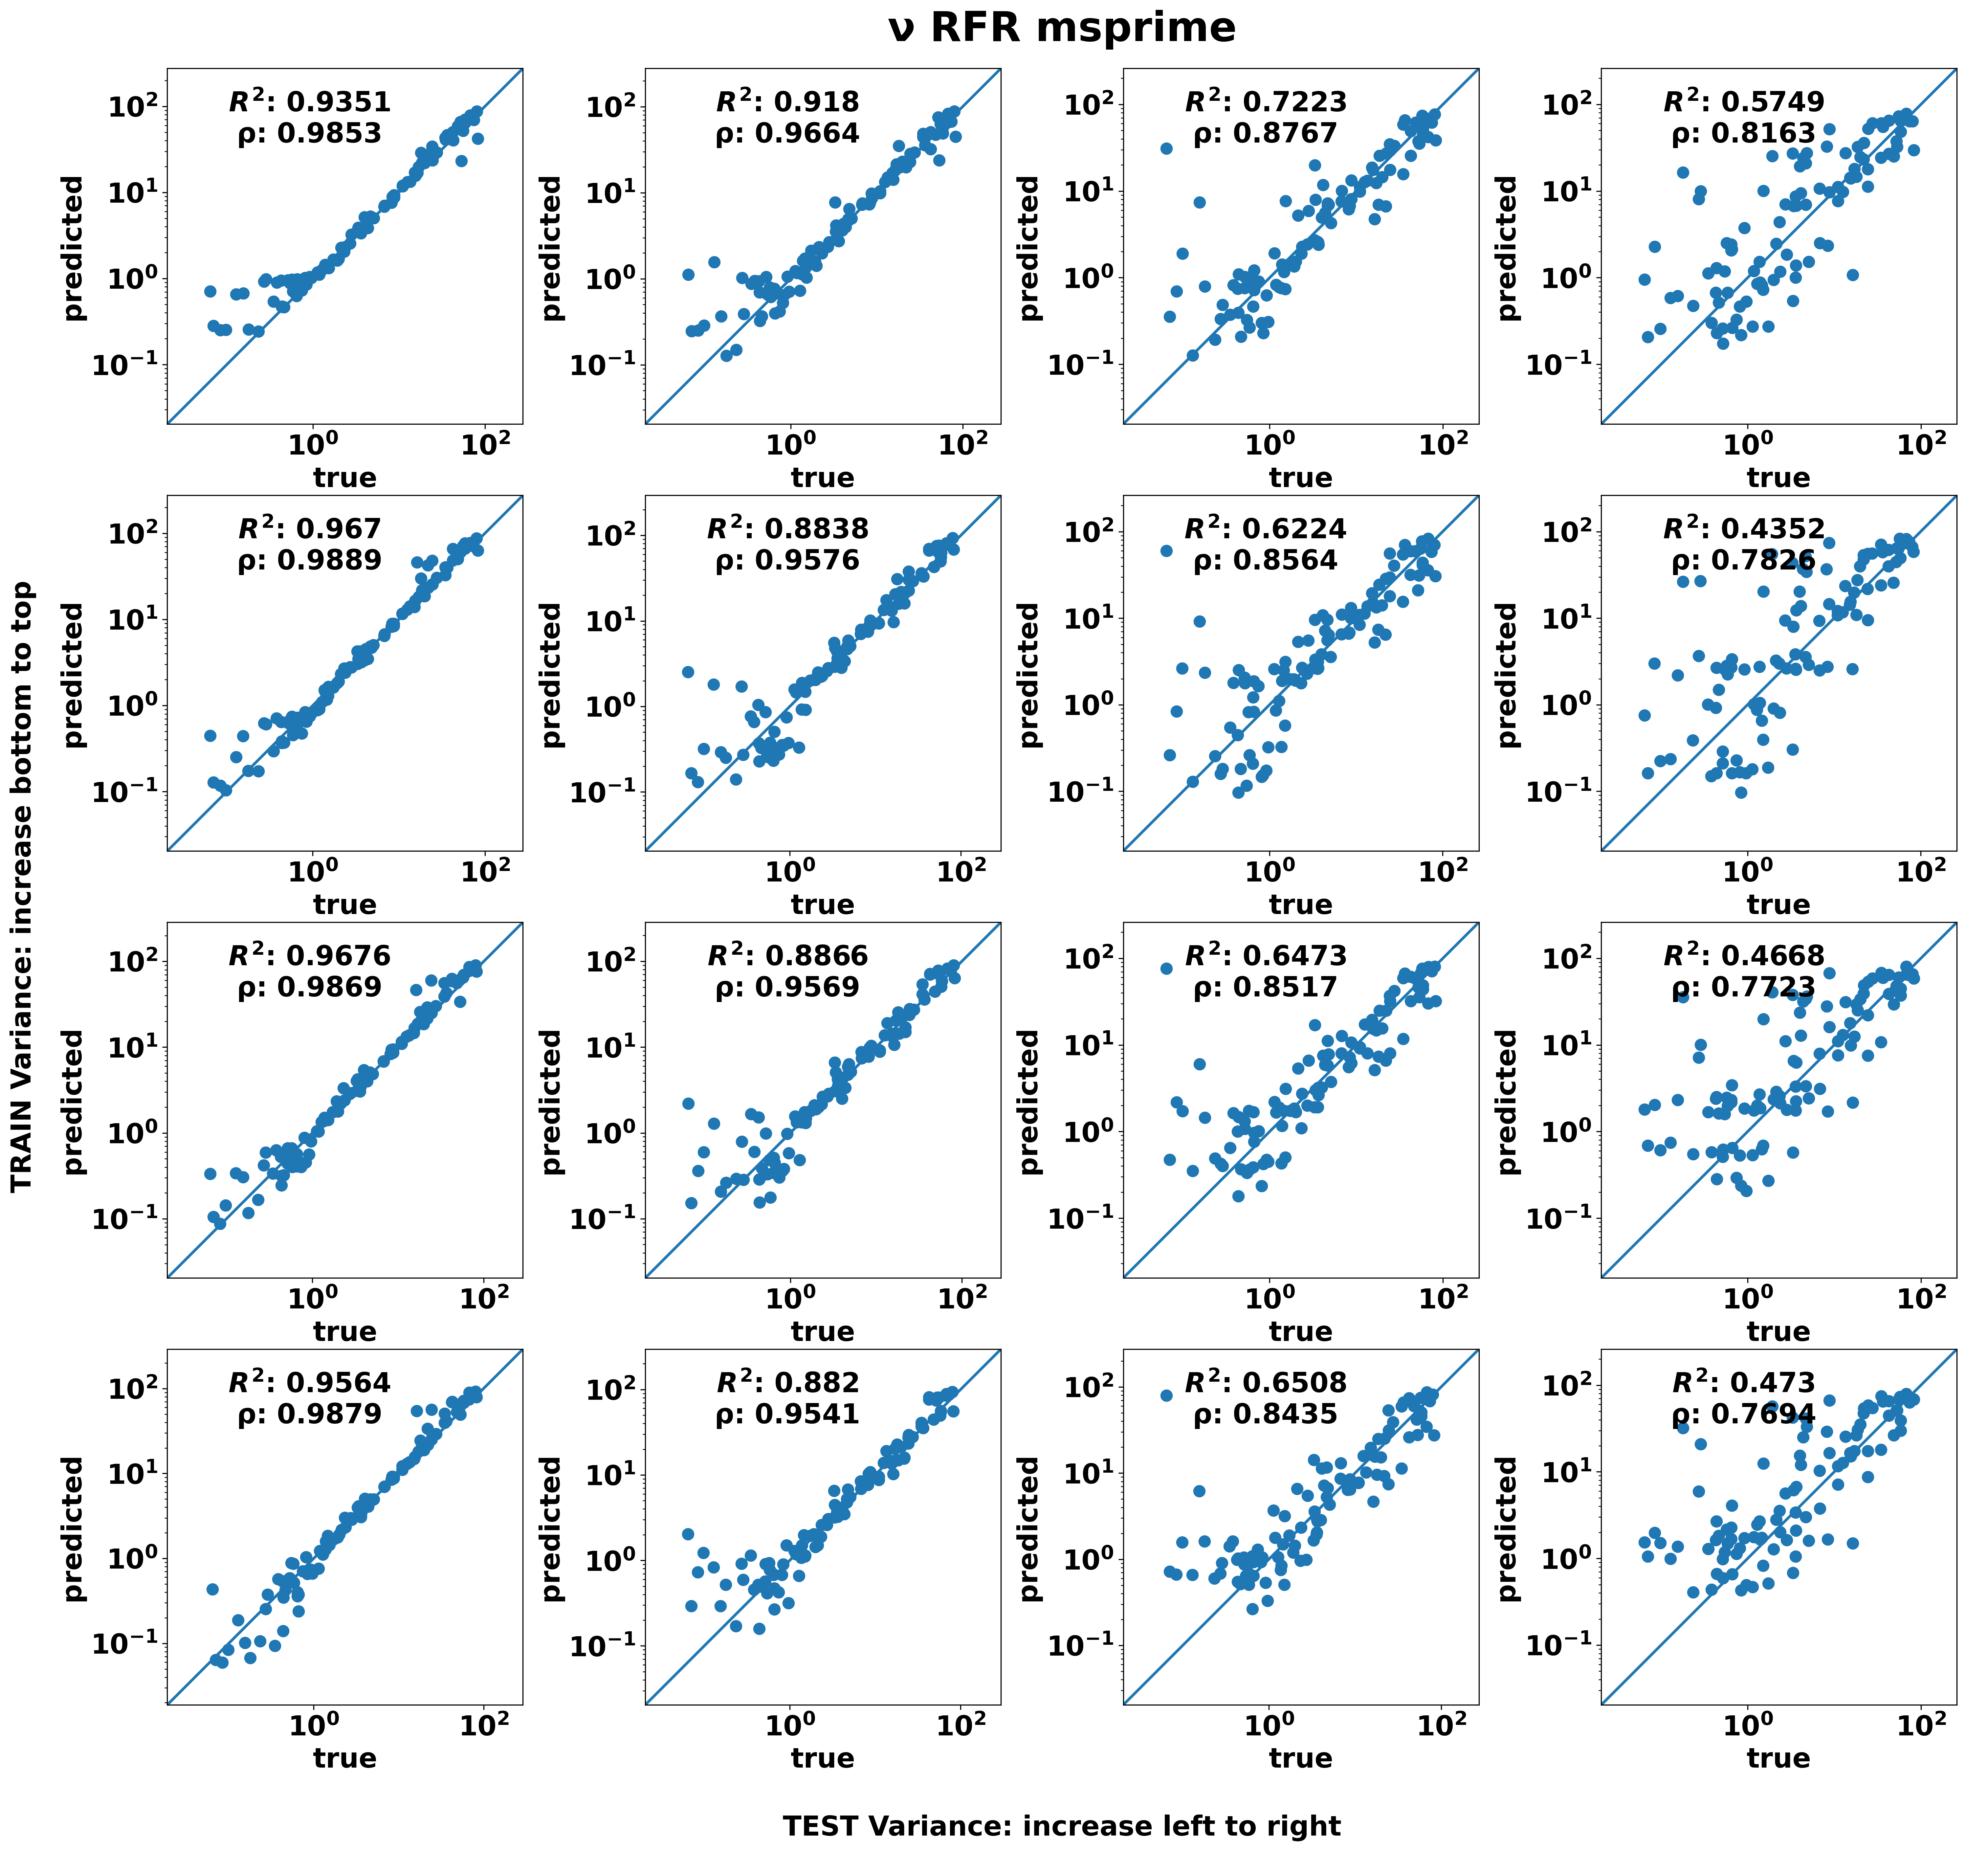

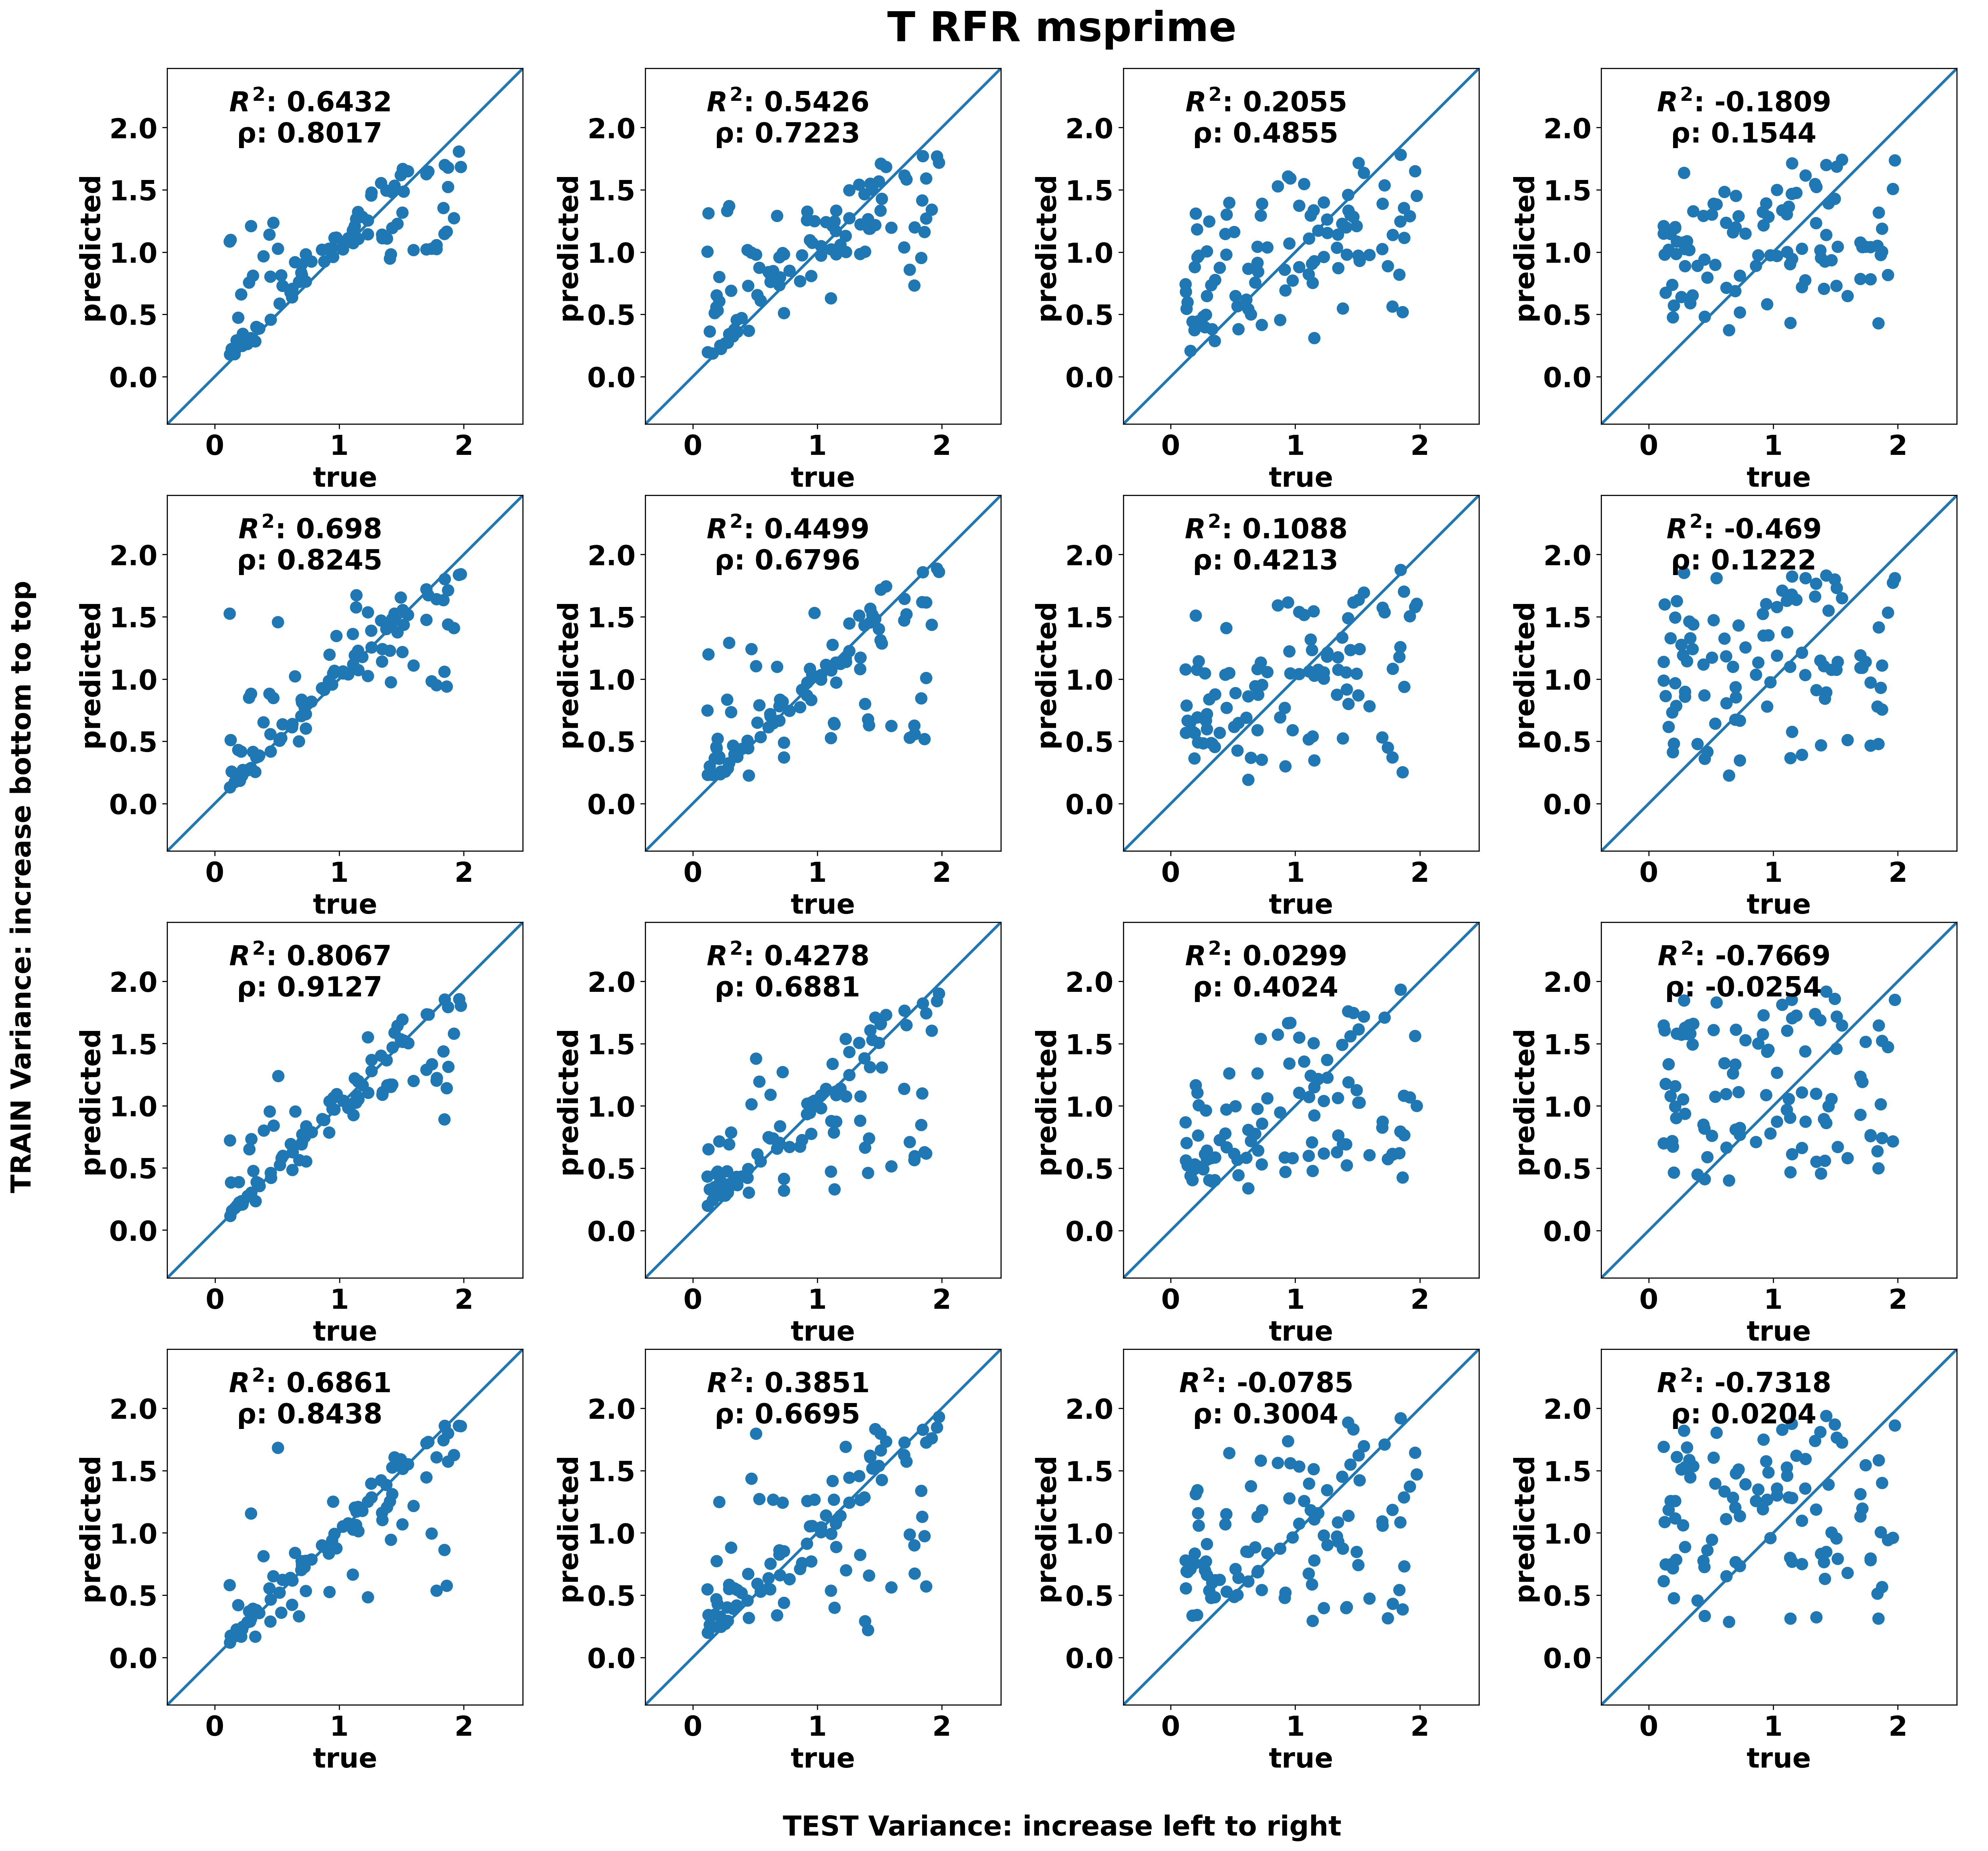

In [10]:
# Plot 4x4 RFR
params = ['ν','T']
model_name = 'RFR msprime'
logs = [True, False]
size = ((30, 20), (20, 80), (8,2,20), (24,22))
# size_format = ( (title_font_size, title_pad), (axis_font_size, axis_pad),
#                   (single_size_tuple), fig_size)
# single_size_tuple = (dots_size, line_width, font_size)
plot_accuracy_multi(list_rfr, list_test_dict_msprime, params, model_name, logs, size)
# save fig
# for i in range(len(params)):
#     plt.figure(i+1).savefig(f'results/{model_name}/{params[i]}_4x4.png')

In [11]:
# pick out a few example dataset to examine more closely
test_params_examp = test_params[::30]
list_test_dict_msprime_examp = []
for test_dict in list_test_dict_msprime:
    test_dict_msprime_examp = {}
    for p in test_params_examp:
        test_dict_msprime_examp[p] = test_dict[p]
    list_test_dict_msprime_examp.append(test_dict_msprime_examp)

(nu, T)=(27.478733298087267, 1.5513723254605811); recomb=0.001


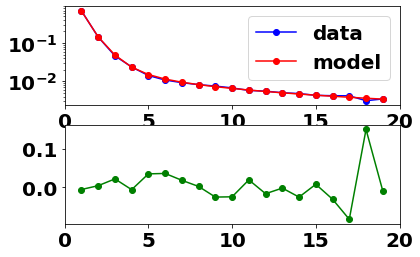

(nu, T)=(82.38843184831114, 0.33266981237742277); recomb=0.001


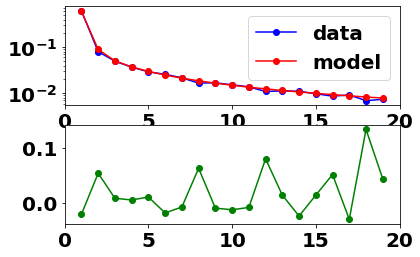

(nu, T)=(58.50808257043288, 1.1512645674228557); recomb=0.001


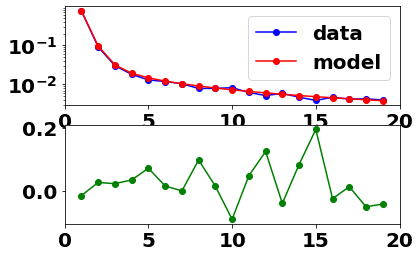

(nu, T)=(0.34935322685380843, 0.6767292535656314); recomb=0.001


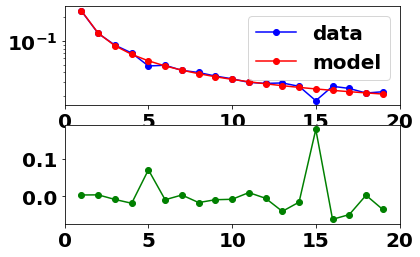

(nu, T)=(27.478733298087267, 1.5513723254605811); recomb=1e-05


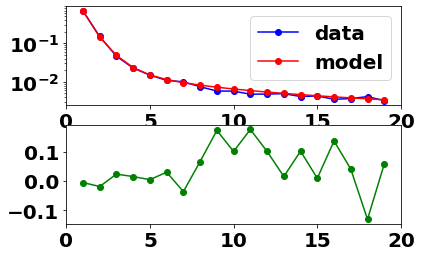

(nu, T)=(82.38843184831114, 0.33266981237742277); recomb=1e-05


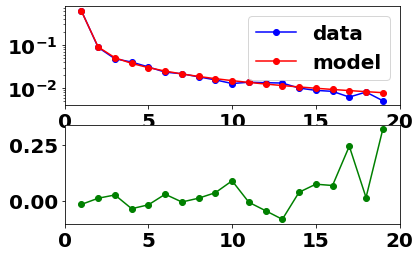

(nu, T)=(58.50808257043288, 1.1512645674228557); recomb=1e-05


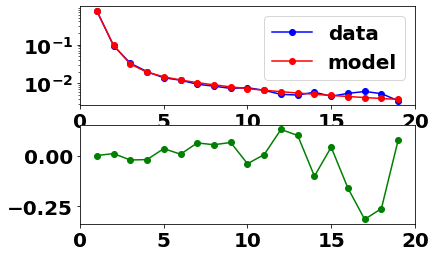

(nu, T)=(0.34935322685380843, 0.6767292535656314); recomb=1e-05


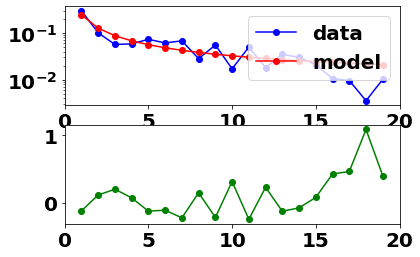

(nu, T)=(27.478733298087267, 1.5513723254605811); recomb=1e-06


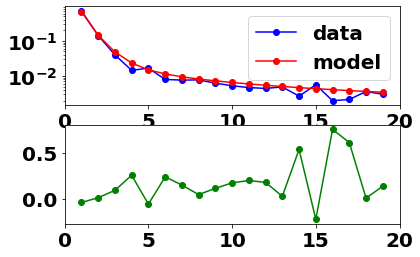

(nu, T)=(82.38843184831114, 0.33266981237742277); recomb=1e-06


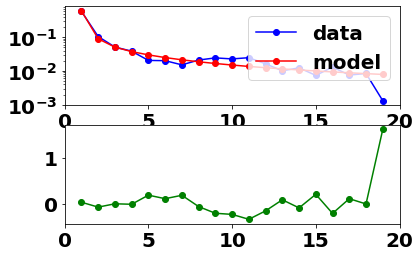

(nu, T)=(58.50808257043288, 1.1512645674228557); recomb=1e-06


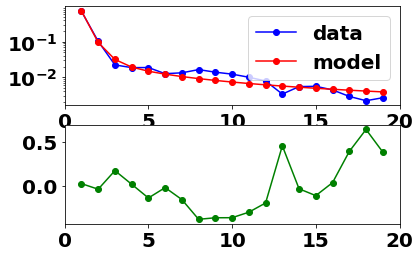

(nu, T)=(0.34935322685380843, 0.6767292535656314); recomb=1e-06


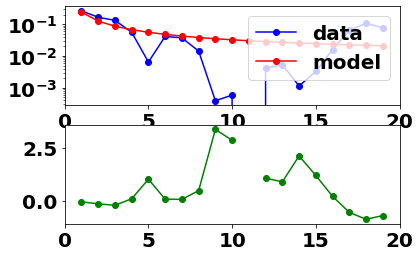

(nu, T)=(27.478733298087267, 1.5513723254605811); recomb=1e-08


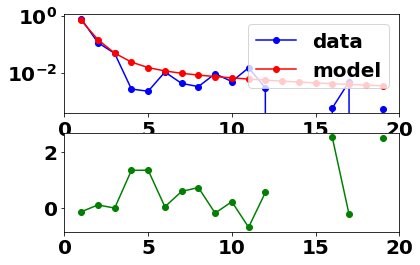

(nu, T)=(82.38843184831114, 0.33266981237742277); recomb=1e-08


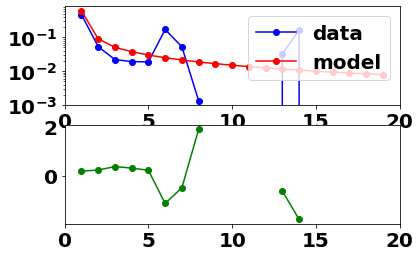

(nu, T)=(58.50808257043288, 1.1512645674228557); recomb=1e-08


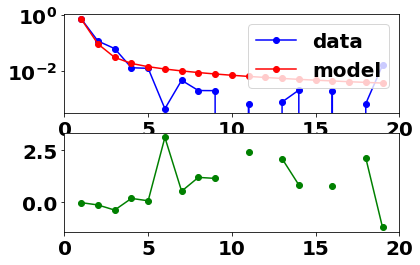

(nu, T)=(0.34935322685380843, 0.6767292535656314); recomb=1e-08


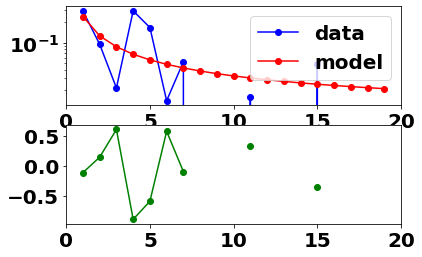

In [17]:
# plot two_epoch model comparison between data (msprime) and model (dadi)
func = dadi.Demographics1D.two_epoch
func_ex = dadi.Numerics.make_extrap_func(func)
ns = [20,]
pts_l = [40, 50, 60]
i=0
for test_dict in list_test_dict_msprime_examp:
    for item in test_dict:
        log_p = (10**item[0], item[1])
        model = func_ex(log_p, ns, pts_l)
        data = test_dict[item]
        print(f'(nu, T)={log_p}; recomb={recomb_list[i]}')
        dadi.Plotting.plot_1d_comp_multinom(model, data)
    i+=1